<a href="https://colab.research.google.com/github/Gkcoli/CCDATSCL_ASSIGNMENT_COM222-ML/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [85]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [86]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

Store the dataset’s column names in a variable called cols.

In [87]:
# put your answer here
mycols = df.columns
print("\nColumn names:")
print(mycols)


Column names:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [88]:
# put your answer here
shape_info = df.shape
print(f"\nDataset shape: {shape_info}")


Dataset shape: (8807, 12)


## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [89]:
missing_counts = df.isnull().sum()
print("\nMissing values per column:\n", missing_counts)




Missing values per column:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Drop rows where duration is missing. Save to df_clean.

In [90]:
df_clean = df.dropna(subset=['duration'])
print(f"After cleaning - shape: {df_clean.shape}")

After cleaning - shape: (8804, 12)


In [91]:
display(df.head(10))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [92]:
df_num = df_clean[df_clean['duration'].str.contains('min', na=False)].copy()
df_num['duration'] = df_num['duration'].str.replace(' min', '').astype(int)
df_num = df_num[['release_year', 'duration']]
print(df_num.head(10))

    release_year  duration
0           2020        90
6           2021        91
7           1993       125
9           2021       104
12          2021       127
13          2021        91
16          2020        67
18          2021        94
22          1996       161
23          2021        61


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [93]:
# put your answer here.
df_clean['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [94]:
df['listed_in'].unique()


array(['Documentaries', 'International TV Shows, TV Dramas, TV Mysteries',
       'Crime TV Shows, International TV Shows, TV Action & Adventure',
       'Docuseries, Reality TV',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'TV Dramas, TV Horror, TV Mysteries', 'Children & Family Movies',
       'Dramas, Independent Movies, International Movies',
       'British TV Shows, Reality TV', 'Comedies, Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Dramas, International Movies',
       'Children & Family Movies, Comedies',
       'British TV Shows, Crime TV Shows, Docuseries',
       'TV Comedies, TV Dramas', 'Documentaries, International Movies',
       'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
       'Thrillers',
       'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
       'International TV Shows, TV Action & Adventure, TV Dramas',
       'Comedies, International Movies',
       'Comedies, 

In [95]:
df_clean = df_clean[df_clean['duration'].str.contains('min')].copy()
df_clean['duration_minutes'] = df_clean['duration'].str.replace(' min', '').astype(int)
dur = df_clean['duration_minutes']

Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [96]:
dur_minmax = (dur - dur.min()) / (dur.max() - dur.min())


Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [97]:
dur_zscore = (dur - dur.mean()) / dur.std()


## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [98]:
df_clean['duration_equal_width_bin'] = pd.cut(dur, bins=4)
dur_width_bins = df_clean['duration_equal_width_bin']


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

In [99]:
print(dur_width_bins.value_counts().sort_index())
print(dur_width_bins.cat.categories)

duration_equal_width_bin
(2.691, 80.25]     1093
(80.25, 157.5]     4860
(157.5, 234.75]     171
(234.75, 312.0]       4
Name: count, dtype: int64
IntervalIndex([(2.691, 80.25], (80.25, 157.5], (157.5, 234.75],
               (234.75, 312.0]],
              dtype='interval[float64, right]')


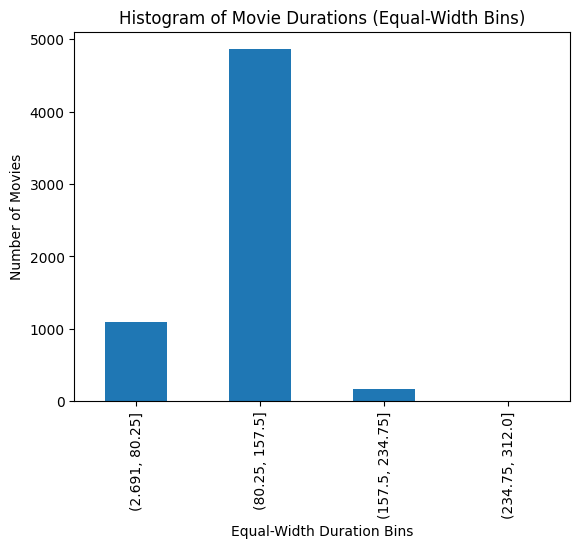

In [100]:
import matplotlib.pyplot as plt

plt.figure()
dur_width_bins.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Equal-Width Duration Bins")
plt.ylabel("Number of Movies")
plt.title("Histogram of Movie Durations (Equal-Width Bins)")
plt.show()


Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [101]:
df_clean['duration_equal_freq_bin'] = pd.qcut(dur, q=4)
dur_quantile_bins = df_clean['duration_equal_freq_bin']


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

In [102]:
print(dur_quantile_bins.value_counts())
print(dur_quantile_bins.cat.categories)


duration_equal_freq_bin
(2.999, 87.0]     1616
(114.0, 312.0]    1528
(98.0, 114.0]     1512
(87.0, 98.0]      1472
Name: count, dtype: int64
IntervalIndex([(2.999, 87.0], (87.0, 98.0], (98.0, 114.0], (114.0, 312.0]], dtype='interval[float64, right]')


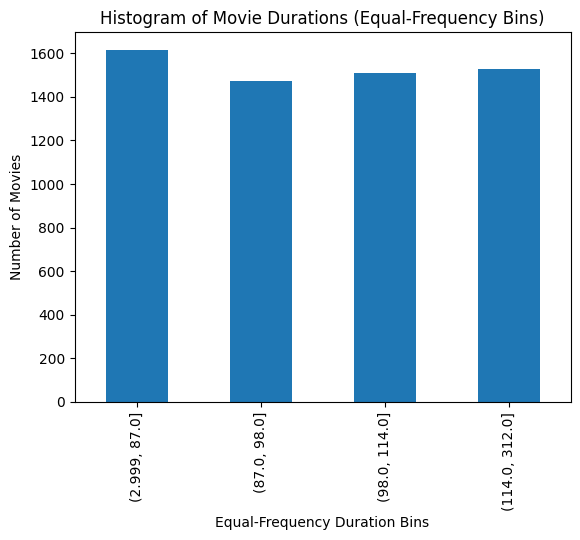

In [103]:
plt.figure()
dur_quantile_bins.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Equal-Frequency Duration Bins")
plt.ylabel("Number of Movies")
plt.title("Histogram of Movie Durations (Equal-Frequency Bins)")
plt.show()


In [104]:
def duration_to_minutes(value):
    if 'min' in value:
        return int(value.replace(' min', ''))
    elif 'Season' in value:
        seasons = int(value.split()[0])
        return seasons * 450  # 1 season ≈ 450 minutes
    return np.nan

df_dur = df.dropna(subset=['duration']).copy()
df_dur['duration_minutes'] = df_dur['duration'].apply(duration_to_minutes)

movies = df_dur[df_dur['type'] == 'Movie']
tv_shows = df_dur[df_dur['type'] == 'TV Show']

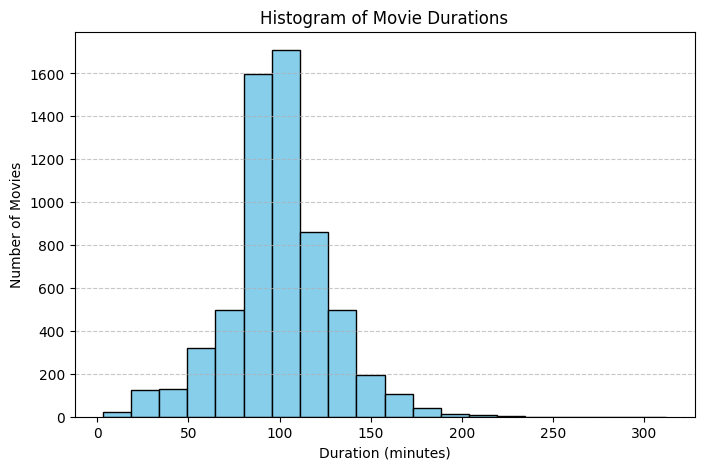

In [105]:
plt.figure(figsize=(8,5))
plt.hist(movies['duration_minutes'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Histogram of Movie Durations")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


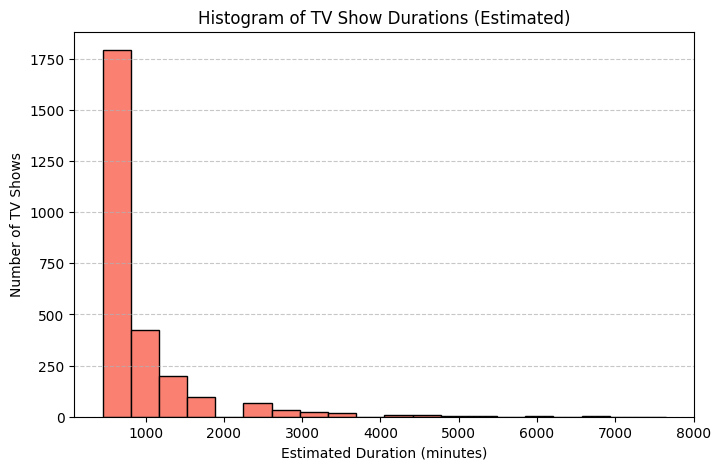

In [106]:
plt.figure(figsize=(8,5))
plt.hist(tv_shows['duration_minutes'], bins=20, color='salmon', edgecolor='black')
plt.xlabel("Estimated Duration (minutes)")
plt.ylabel("Number of TV Shows")
plt.title("Histogram of TV Show Durations (Estimated)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


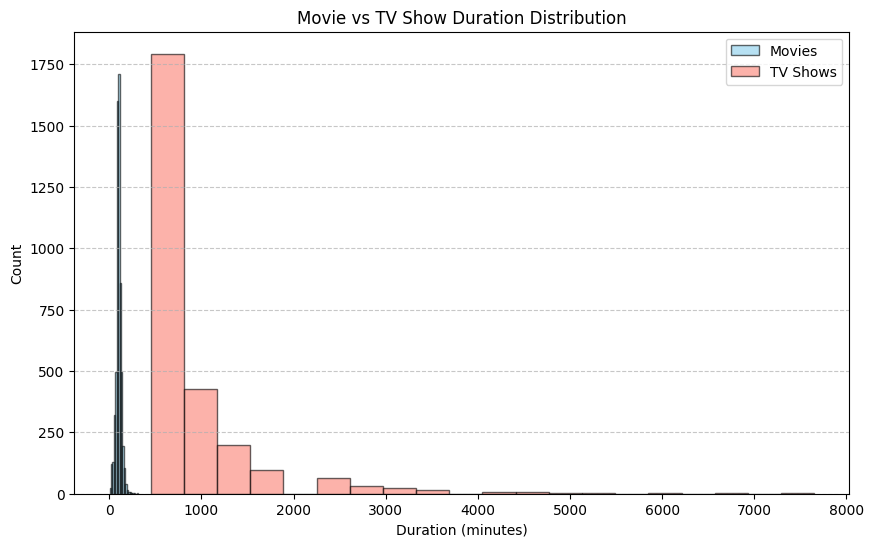

In [107]:
plt.figure(figsize=(10,6))
plt.hist(movies['duration_minutes'], bins=20, alpha=0.6, label='Movies', color='skyblue', edgecolor='black')
plt.hist(tv_shows['duration_minutes'], bins=20, alpha=0.6, label='TV Shows', color='salmon', edgecolor='black')
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.title("Movie vs TV Show Duration Distribution")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Features and target
X = df_dur[['release_year', 'duration_minutes']]
y = df_dur['type']


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [109]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [110]:
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)
print("KNN Accuracy (raw features):", acc_raw)

KNN Accuracy (raw features): 1.0


In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print("KNN Accuracy (scaled features):", acc_scaled)


KNN Accuracy (scaled features): 1.0


Did scaling improve accuracy? Explain why.

## In this dataset, both the raw and scaled KNN models achieved perfect accuracy of 1.0. This indicates that the features release_year and duration_minutes are already sufficient to perfectly separate Movies from TV Shows. As a result, scaling did not change the classifier’s performance. Scaling is generally important for distance-based algorithms like KNN to ensure features with larger numeric ranges do not dominate the distance calculation, but in this case, the classes are easily distinguishable even without scaling.